### Essential Libraries

Let us begin by importing the essential Python Libraries.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

---

### Import the Dataset

In [2]:
rawdata = pd.read_csv(os.path.join("data","Cardiovascular_Disease_Dataset.csv"))
data = pd.read_pickle(os.path.join("data","data_postprep.pkl"))
data.head()

,age,restingBP,serumcholestrol,maxheartrate,oldpeak,noofmajorvessels,isMale,fastingbloodsugar,exerciseangia,chestpain_Asymptomatic,...,chestpain_NonAnginal,chestpain_TypicalAngina,restingrelectro_LeftVentricularHypertrophy,restingrelectro_Normal,restingrelectro_WaveAbnormality,slope_Downsloping,slope_Flat,slope_Undefined,slope_Upsloping,hasHeartDisease
0,53,171,0,147,5.3,3,True,False,False,False,...,True,False,False,False,True,True,False,False,False,True
1,40,94,229,115,3.7,1,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
2,49,133,142,202,5.0,0,True,False,True,False,...,True,False,False,True,False,False,False,False,True,False
3,43,138,295,153,3.2,2,True,True,False,False,...,False,True,False,False,True,False,True,False,False,True
4,31,199,0,136,5.3,2,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True


---

# Exploration of dataset

In [3]:
print("Data dimensions : ", data.shape)

Data dimensions :  (1000, 21)


We can see the dataset contains 1000 patients and 21 variables after refining the raw dataset.

In [4]:
data.dtypes

age                                             int64
restingBP                                       int64
serumcholestrol                                 int64
maxheartrate                                    int64
oldpeak                                       float64
noofmajorvessels                                int64
isMale                                           bool
fastingbloodsugar                                bool
exerciseangia                                    bool
chestpain_Asymptomatic                           bool
chestpain_AtypicalAngina                         bool
chestpain_NonAnginal                             bool
chestpain_TypicalAngina                          bool
restingrelectro_LeftVentricularHypertrophy       bool
restingrelectro_Normal                           bool
restingrelectro_WaveAbnormality                  bool
slope_Downsloping                                bool
slope_Flat                                       bool
slope_Undefined             

In the raw dataset, some variables (gender, chestpain, fastingbloodsugar, restingrelectro, exerciseangia, slope and classification) seemed like they were numeric but they are actually categorical. The levels of categorical variables are encoded by numbers. After the data preparation stage, the categorical variables have been decomposed into their respective categories and now have the boolean data type.

In [5]:
data.describe()

,age,restingBP,serumcholestrol,maxheartrate,oldpeak,noofmajorvessels
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.24200,151.747000,311.447000,145.477000,2.707700,1.222000
std,17.86473,29.965228,132.443801,34.190268,1.720753,0.977585
min,20.00000,94.000000,0.000000,71.000000,0.000000,0.000000
25%,34.00000,129.000000,235.750000,119.750000,1.300000,0.000000
50%,49.00000,147.000000,318.000000,146.000000,2.400000,1.000000
75%,64.25000,181.000000,404.250000,175.000000,4.100000,2.000000
max,80.00000,200.000000,602.000000,202.000000,6.200000,3.000000


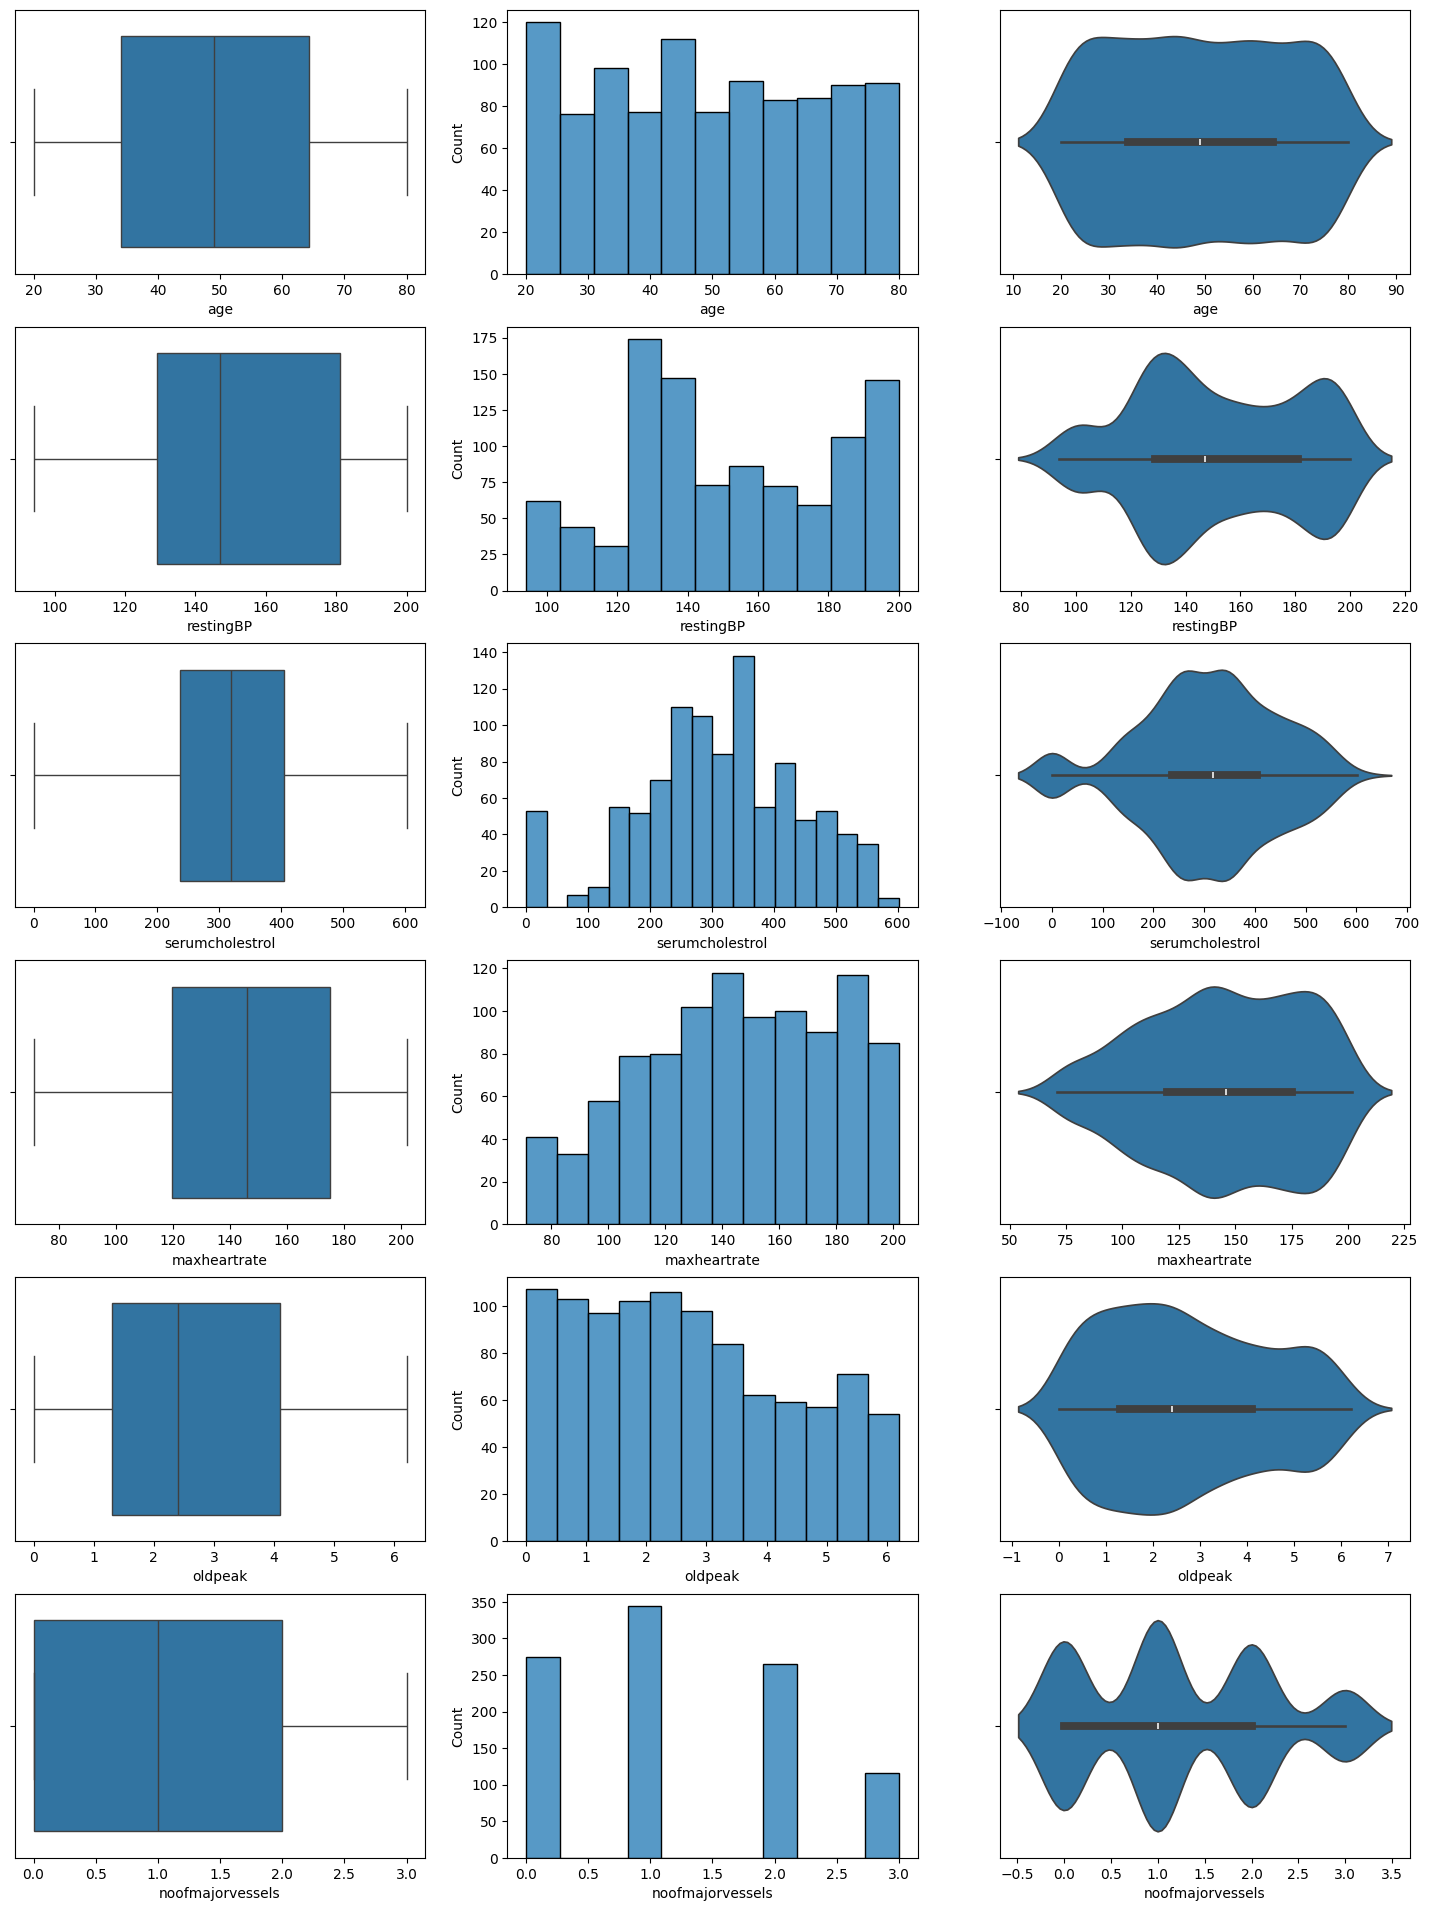

In [6]:
numeric_data = pd.DataFrame(data[["age", "restingBP", "serumcholestrol", "maxheartrate", "oldpeak", "noofmajorvessels"]])

numeric_data.describe().round(2)

f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

The table above provides the basic statistical summary and visualisation of the numeric variables.

### Is there any strong correlation between the numeric variables?

                       age  restingBP  serumcholestrol  maxheartrate  \
age               1.000000  -0.016126         0.035439     -0.040092   
restingBP        -0.016126   1.000000         0.126523      0.095569   
serumcholestrol   0.035439   0.126523         1.000000      0.038967   
maxheartrate     -0.040092   0.095569         0.038967      1.000000   
oldpeak          -0.026020  -0.004225        -0.025910      0.044614   
noofmajorvessels  0.025407   0.263194         0.132419      0.122763   

                   oldpeak  noofmajorvessels  
age              -0.026020          0.025407  
restingBP        -0.004225          0.263194  
serumcholestrol  -0.025910          0.132419  
maxheartrate      0.044614          0.122763  
oldpeak           1.000000          0.086992  
noofmajorvessels  0.086992          1.000000  


<Axes: >

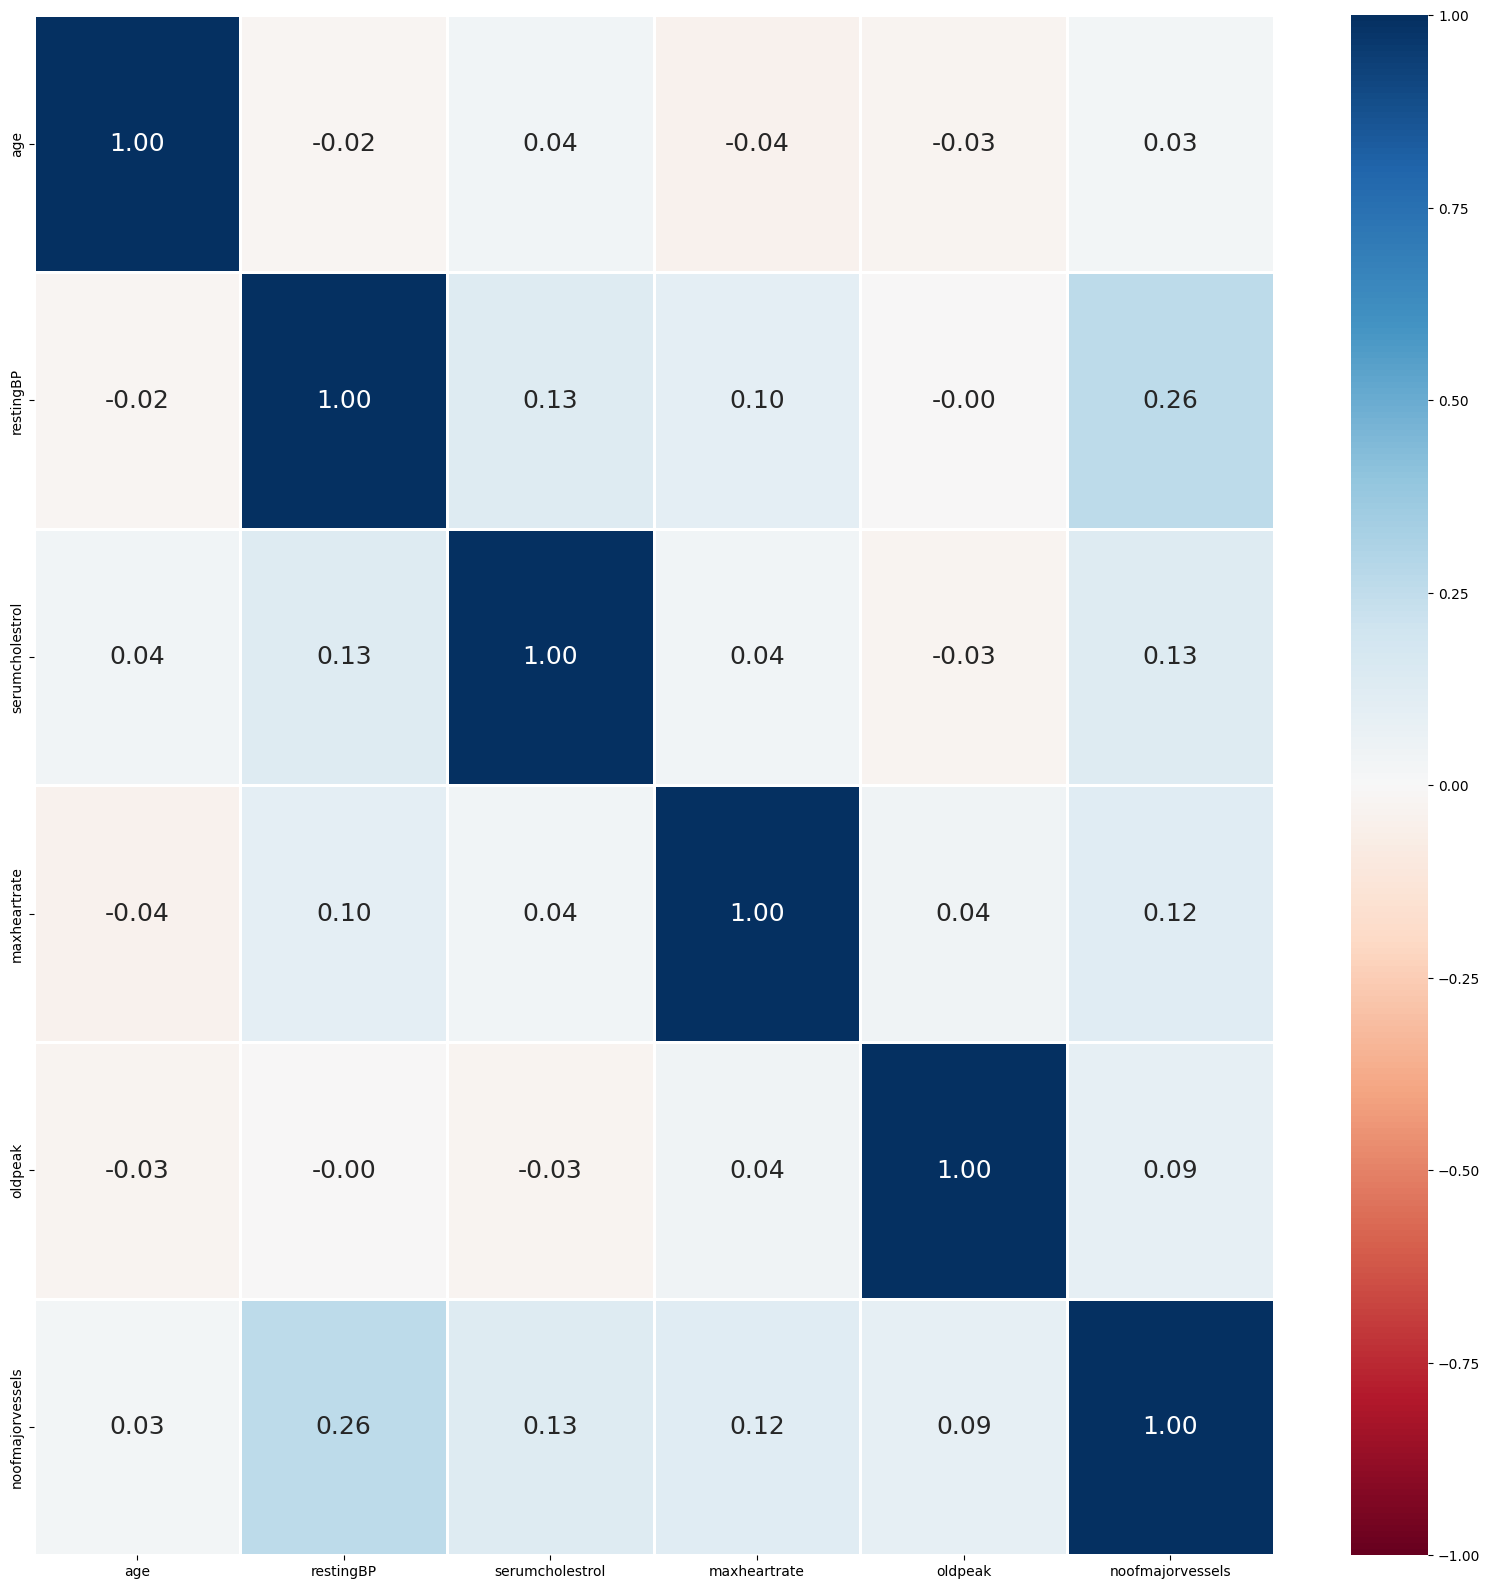

In [7]:
print(numeric_data.corr())
f = plt.figure(figsize=(20, 20))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

As shown above, there is no strong correlation between any of the numeric variables. 
The 2 variables with the strongest correlation are the number of major vessels and resting blood pressure. 
Their correlation of 0.26 is considered a weak correlation, hence we can infer that all numeric variables are independent variables. 

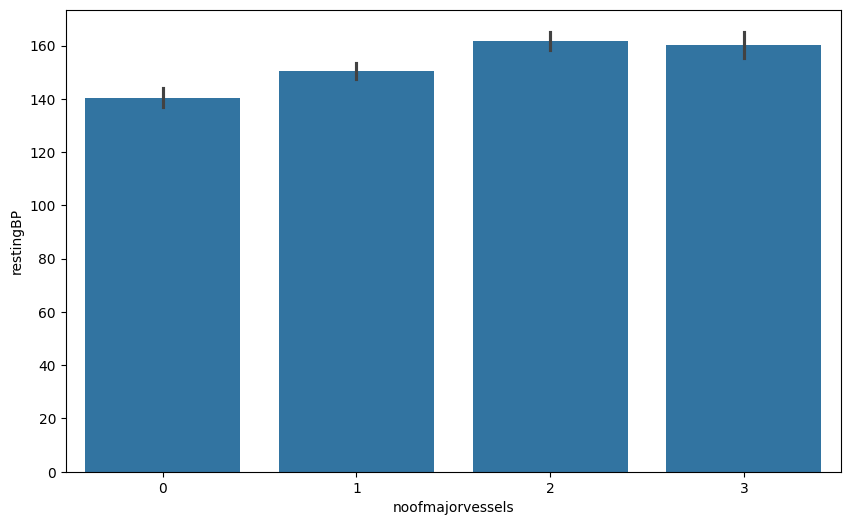

In [8]:
plt.figure(figsize=(10, 6))
sb.barplot(x='noofmajorvessels', y= 'restingBP', data=data)
plt.show()

---
### How many patients have heart disease?

Number of patients with heart disease: 580
Percentage of patients with heart disease: 58.0 %


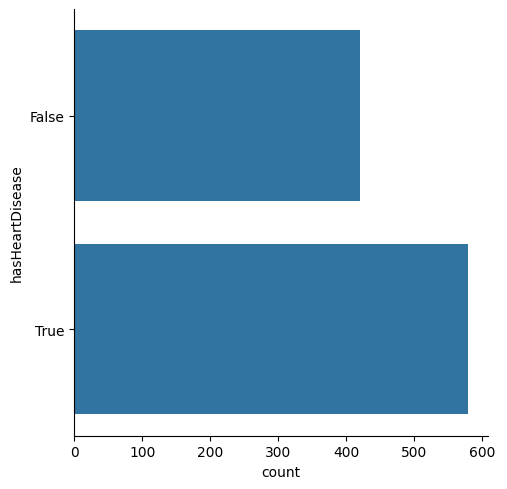

In [9]:
count_hasHeartDiseaseTrue, count_hasHeartDiseaseFalse = data['hasHeartDisease'].value_counts()
print("Number of patients with heart disease:", count_hasHeartDiseaseTrue)
print("Percentage of patients with heart disease:", (count_hasHeartDiseaseTrue) / 10,"%")
sb.catplot(y = "hasHeartDisease", data = data, kind = "count")
hasHeartDisease = pd.DataFrame(data['hasHeartDisease'])

580 patients have heart disease (orange bar), this is a little more than half of the total patients.

### Is there any distinct relationship between the presence of heart disease and the numeric variables?

#### Age and heart disease:

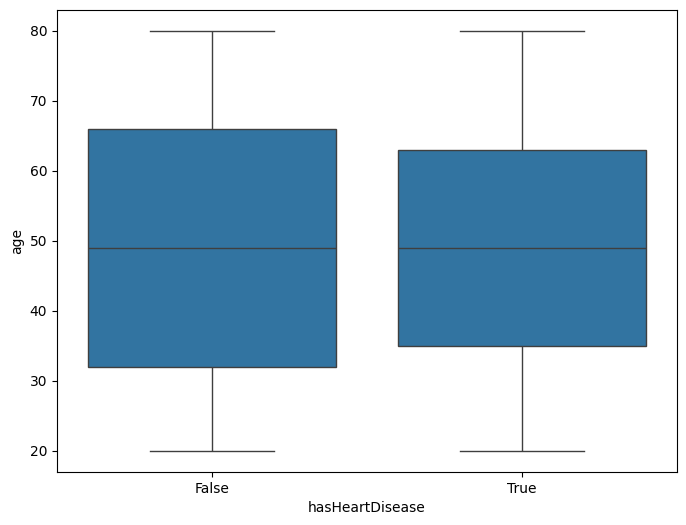

<Axes: xlabel='age', ylabel='hasHeartDisease'>

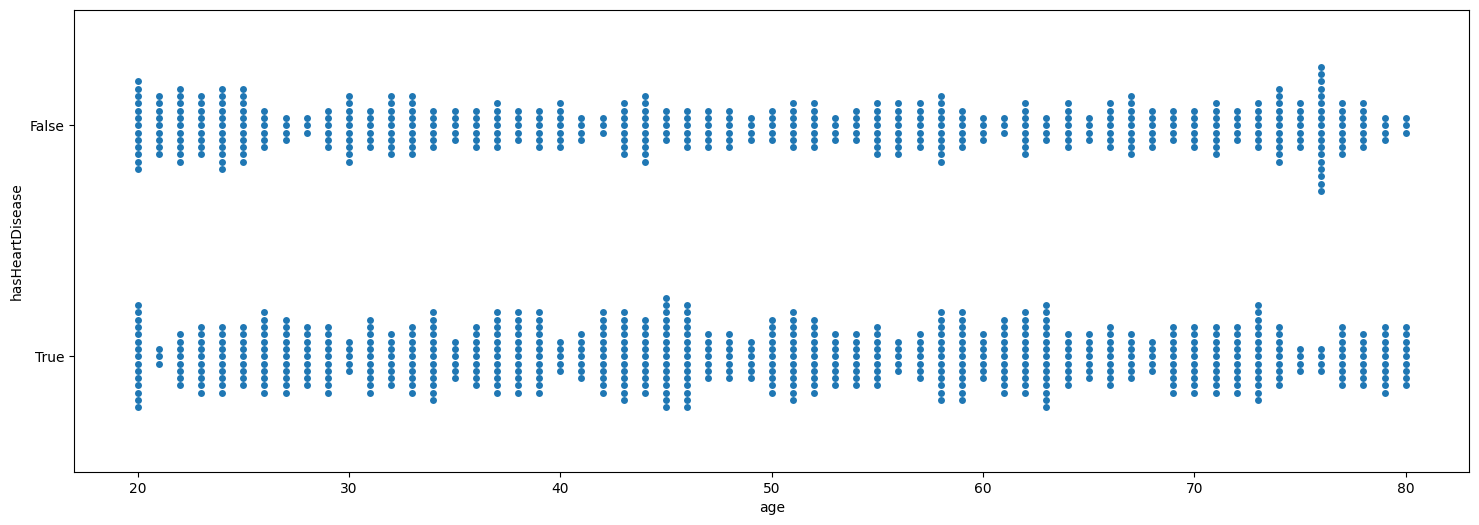

In [10]:
plt.figure(figsize=(8, 6))
sb.boxplot(x='hasHeartDisease', y='age', data=data)
plt.show()

f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "age", y = "hasHeartDisease", data = data, orient = "h")

As shown in the graphs above, we can see that age generally has no effect on whether or not the patient has heart disease. In other words, one can get heart disease regardless of age.

#### Resting blood pressure and heart disease:

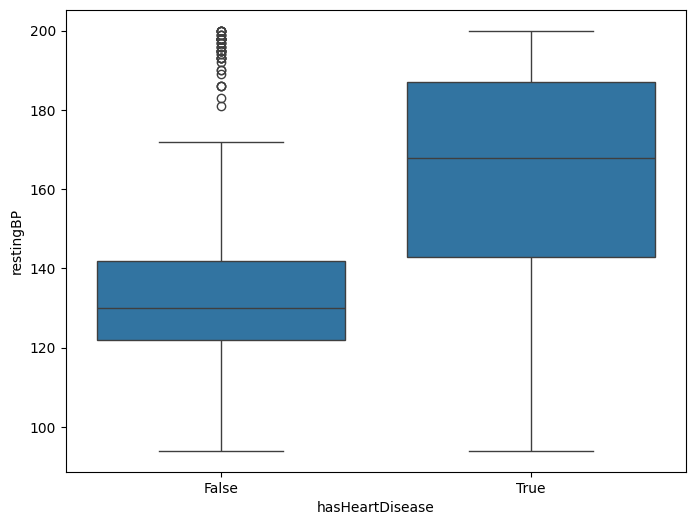

<Axes: xlabel='restingBP', ylabel='hasHeartDisease'>

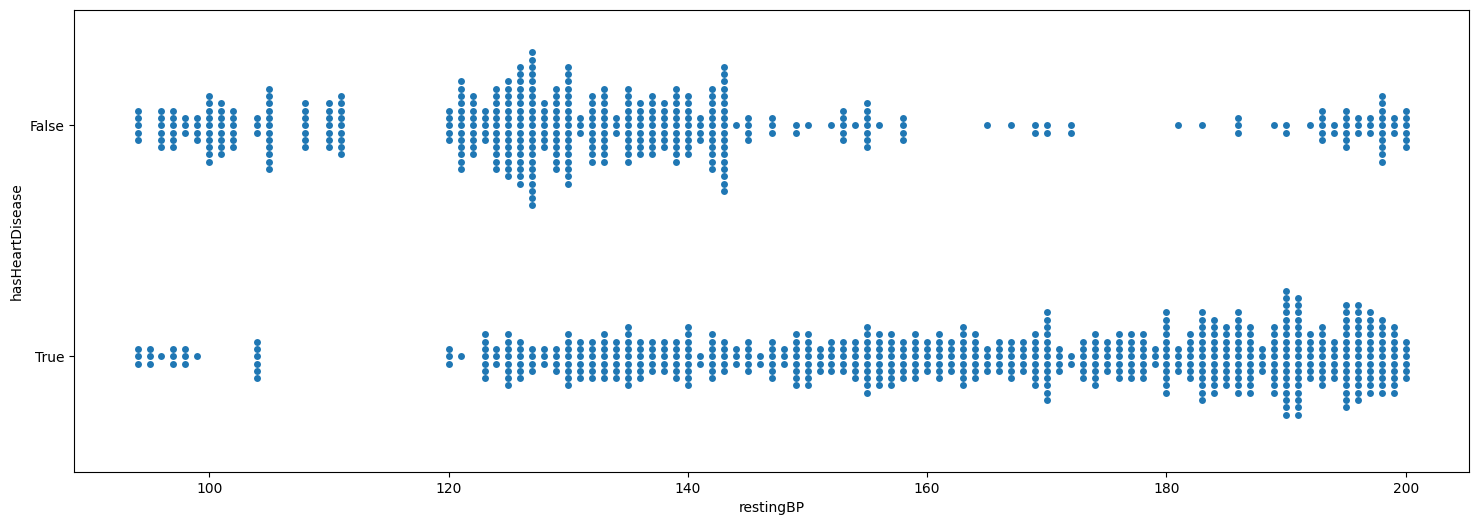

In [11]:
plt.figure(figsize=(8, 6))
sb.boxplot(x='hasHeartDisease', y='restingBP', data=data)
plt.show()

f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "restingBP", y = "hasHeartDisease", data = data, orient = "h")

We can infer from the diagrams above that patients with heart disease tend to have a higher resting blood pressure.

#### Serum cholesterol and heart disease:

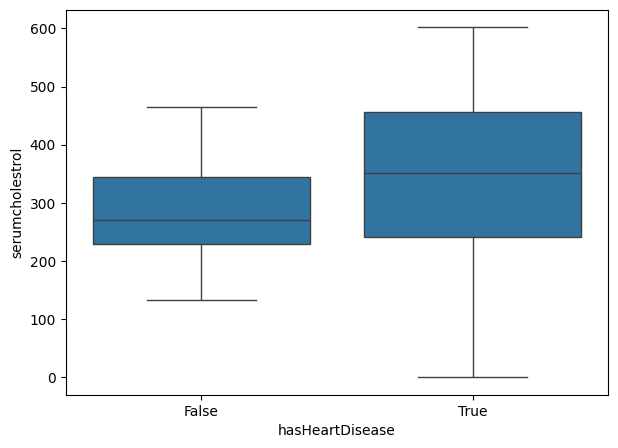

<Axes: xlabel='serumcholestrol', ylabel='hasHeartDisease'>

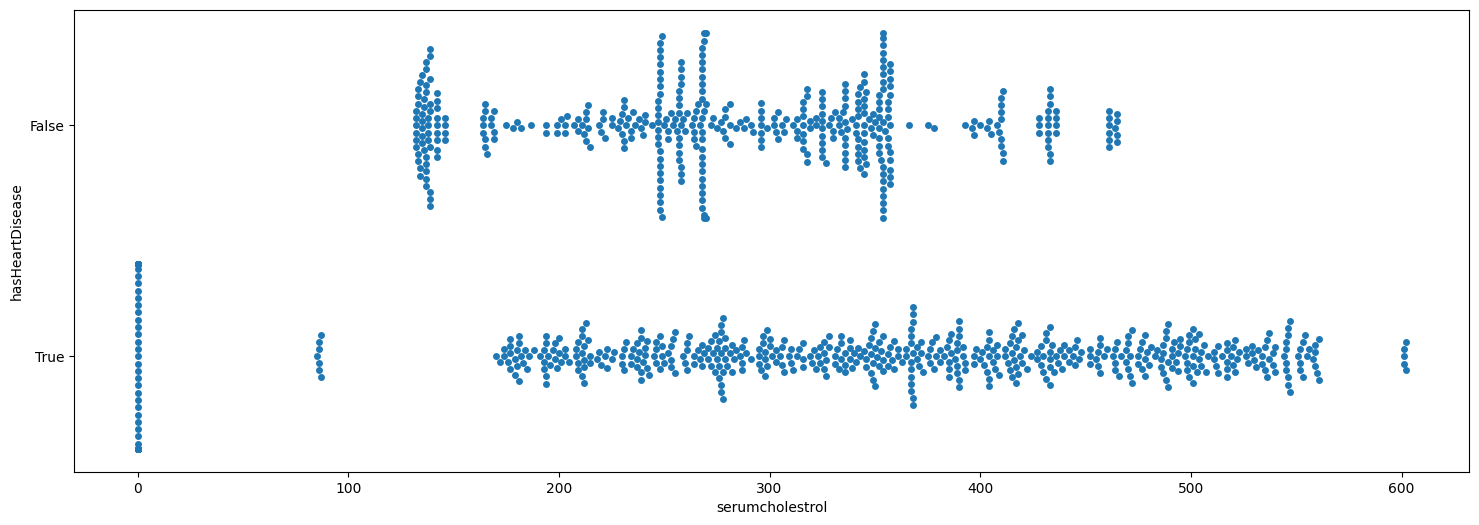

In [12]:
plt.figure(figsize=(7, 5))
sb.boxplot(x='hasHeartDisease', y='serumcholestrol', data=data)
plt.show()
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "serumcholestrol", y = "hasHeartDisease", data = data, orient = "h")

Patients who have heart disease appear to have a larger range of serum cholesterol than those who do not have heart disease. Hence, we can infer that patients with heart disease does not corelate with those with higher serum cholesterol. 

#### Maximum heart rate and heart disease:

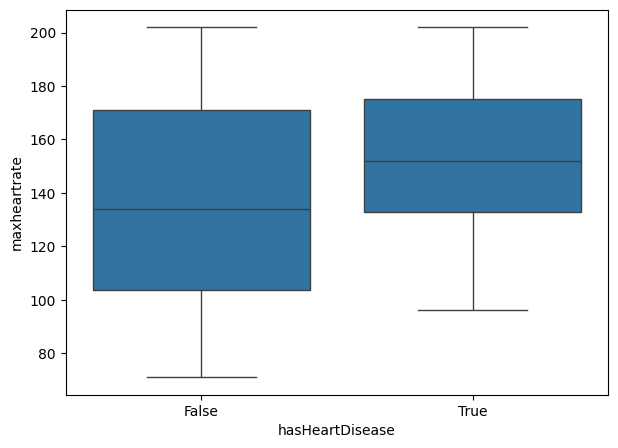

<Axes: xlabel='maxheartrate', ylabel='hasHeartDisease'>

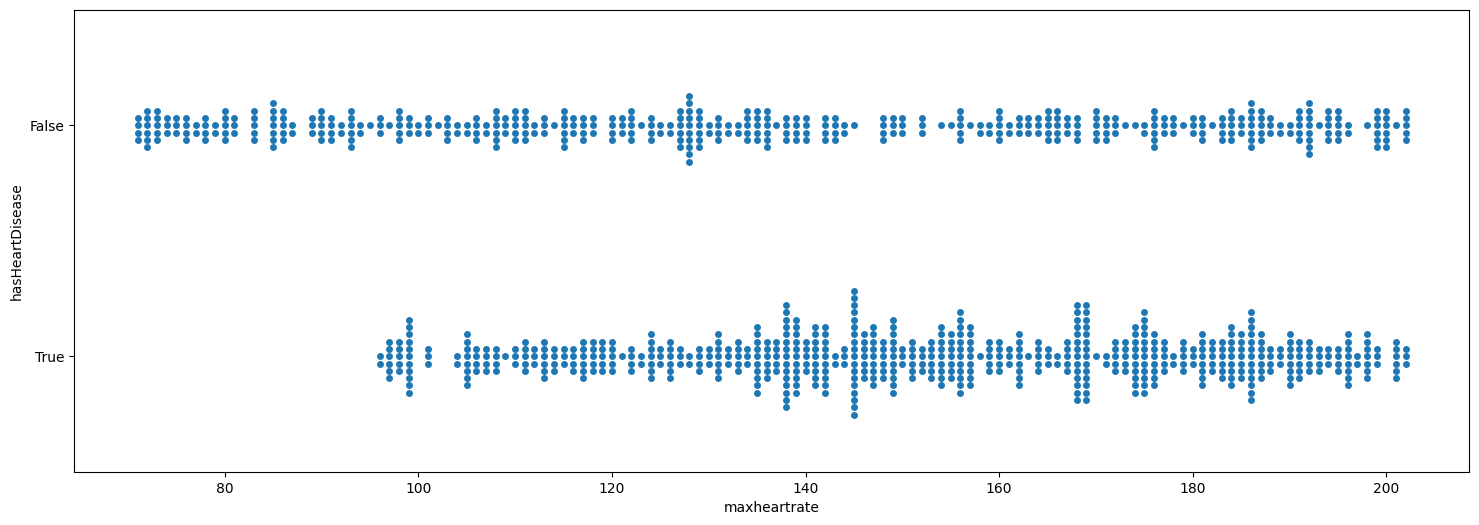

In [13]:
plt.figure(figsize=(7, 5))
sb.boxplot(x='hasHeartDisease', y='maxheartrate', data=data)
plt.show()

f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "maxheartrate", y = "hasHeartDisease", data = data, orient = "h")


Patients who have heart disease have a higher median maximum heart rate than those who do not. 
The range of maximum heart rate for patients with heart disease is also shorter. 
Hence, we can infer that there is a risk of having heart disease for patients with a max heart rate of above 100. 

#### Oldpeak and heart disease:

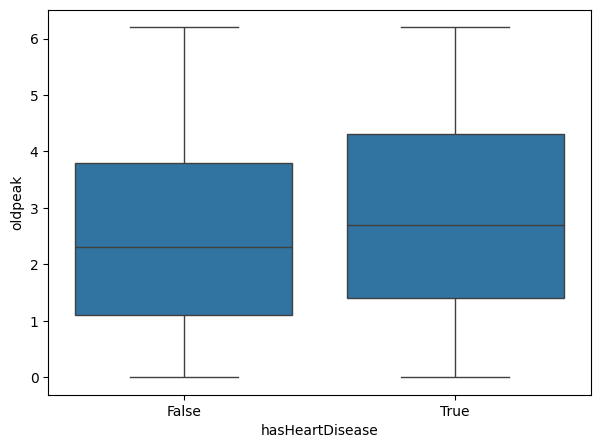

<Axes: xlabel='oldpeak', ylabel='hasHeartDisease'>

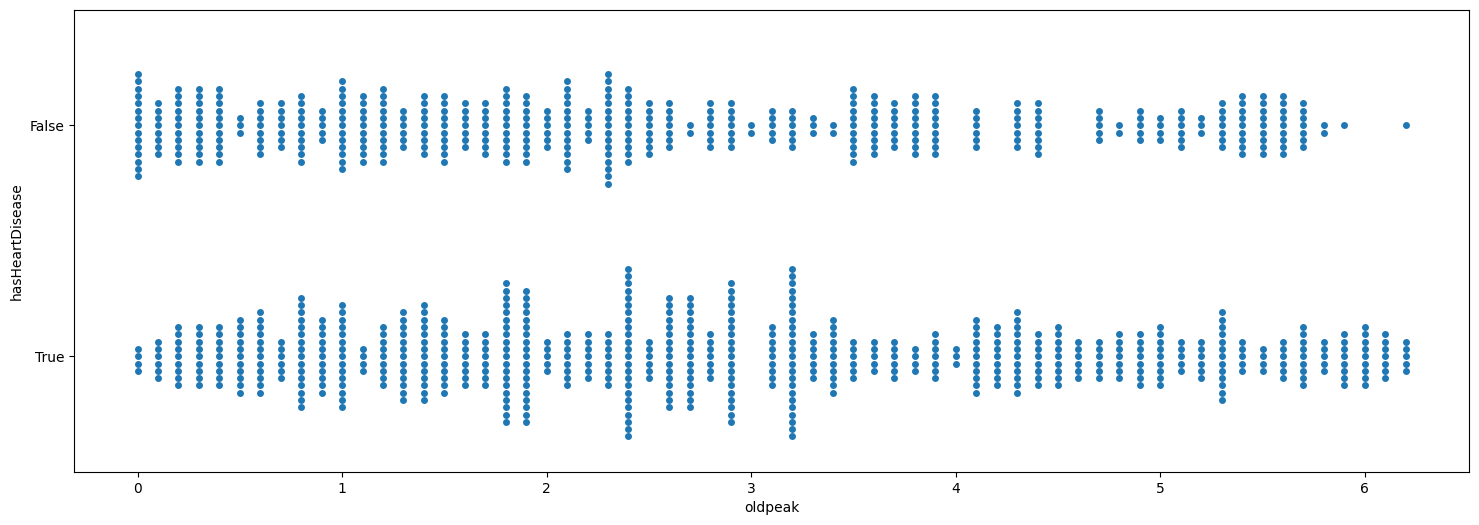

In [14]:
plt.figure(figsize=(7, 5))
sb.boxplot(x='hasHeartDisease', y='oldpeak', data=data)
plt.show()

f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "oldpeak", y = "hasHeartDisease", data = data, orient = "h")

There is no significant difference in oldpeak for patients with and without heart disease. Hence we can infer that old peak and having heart disease has no correlation. 

#### Number of major blood vessels and heart disease:

noofmajorvessels
1    344
0    275
2    265
3    116
Name: count, dtype: int64


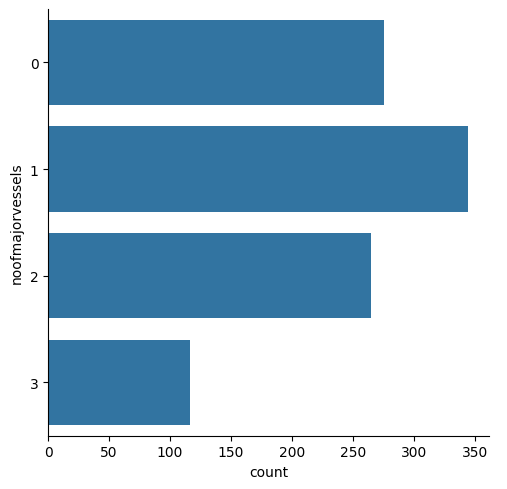

In [15]:
print(data['noofmajorvessels'].value_counts())
sb.catplot(y = "noofmajorvessels", data = data, kind = "count")

Most patients have only 1 major vessel 

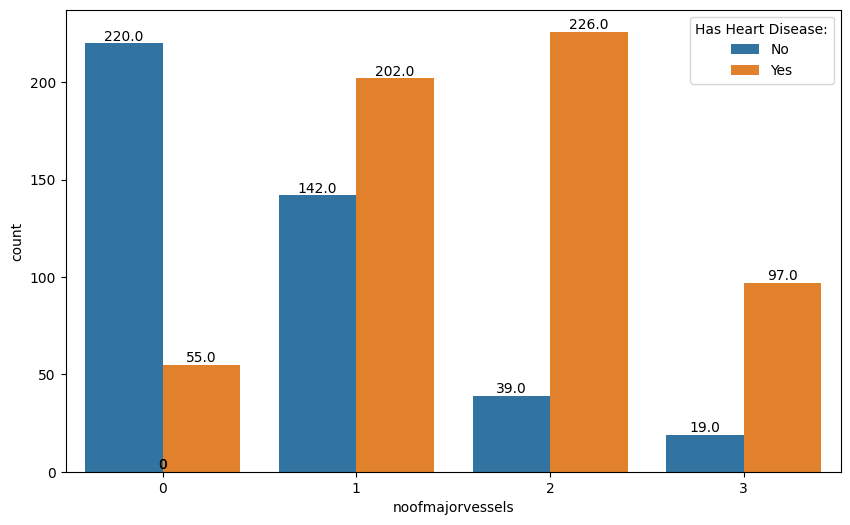

In [16]:
plt.figure(figsize=(10, 6))
ax = sb.countplot(x='noofmajorvessels', hue='target', data=rawdata)
plt.xticks(ticks=[0, 1, 2, 3], labels=['0', '1', '2', '3'])
plt.legend(title='Has Heart Disease:', labels=['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    x = p.get_x()  # Get the x-position of the bar
    width = p.get_width()  # Get the width of the bar
    
    # Annotate the bar with count value
    ax.annotate(f'{height}', (x + width/2, height), ha='center', va='bottom', fontsize=10)

plt.show()

In [17]:
zero = (55/275)*100
one = (202/344)*100
two = (226/265)*100
three = (97/116)*100
print("Percentage of no major vessels with heart disease:{:.1f}%".format(zero))
print("Percentage of 1 major vessel with heart disease:{:.1f}%".format(one))
print("Percentage of 2 major vessel with heart disease:{:.1f}%".format(two))
print("Percentage of 3 major vessel with heart disease:{:.1f}%".format(three))

Percentage of no major vessels with heart disease:20.0%
Percentage of 1 major vessel with heart disease:58.7%
Percentage of 2 major vessel with heart disease:85.3%
Percentage of 3 major vessel with heart disease:83.6%


As shown from above, patients with 2 or more major blood vessels are at higher risks of having heart disease. 
Therefore we can infer that 2 or more major blood vessels is a significant factor to predict heart disease. 

---
### Is there any strong correlation between the presence of heart disease and the other boolean variables?

#### Gender and heart disease:

Number of male patients: 765
Number of female patients: 235


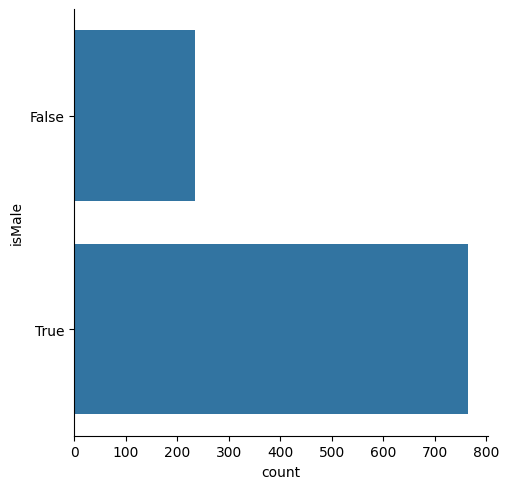

In [18]:
count_male, count_female = data['isMale'].value_counts()
print("Number of male patients:", count_male)
print("Number of female patients:", count_female)
sb.catplot(y = "isMale", data = data, kind = "count")

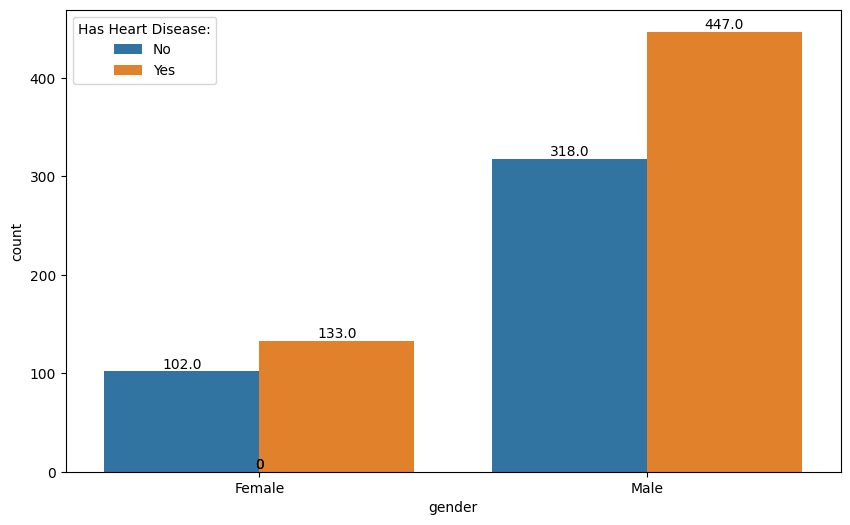

In [19]:
plt.figure(figsize=(10, 6))
ax = sb.countplot(x='gender', hue='target', data=rawdata)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.legend(title='Has Heart Disease:', labels=['No', 'Yes'])

# Annotate the plot with count values
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    x = p.get_x()  # Get the x-position of the bar
    width = p.get_width()  # Get the width of the bar
    
    # Annotate the bar with count value
    ax.annotate(f'{height}', (x + width/2, height), ha='center', va='bottom', fontsize=10)

plt.show()

In [20]:
Fpercentage = (133/235)*100
Mpercentage = (447/765)*100
print("Percentage of Females with heart disease:{:.1f}%".format(Fpercentage))
print("Percentage of Males with heart disease:{:.1f}%".format(Mpercentage))

Percentage of Females with heart disease:56.6%
Percentage of Males with heart disease:58.4%


According to the analysis of the graph, both females and males have about the same tendency of having heart diesease. Hence, gender is not a considerable factor in predicting heart diseases. 

### Chest pain and heart disease:

#### What is the most common type of chest pain amongst our patients?

Number of patients with typical angina: 420
Number of patients with atypical angina: 224
Number of patients with non-anginal pain: 312
Number of patients with asymptomatic pain: 44


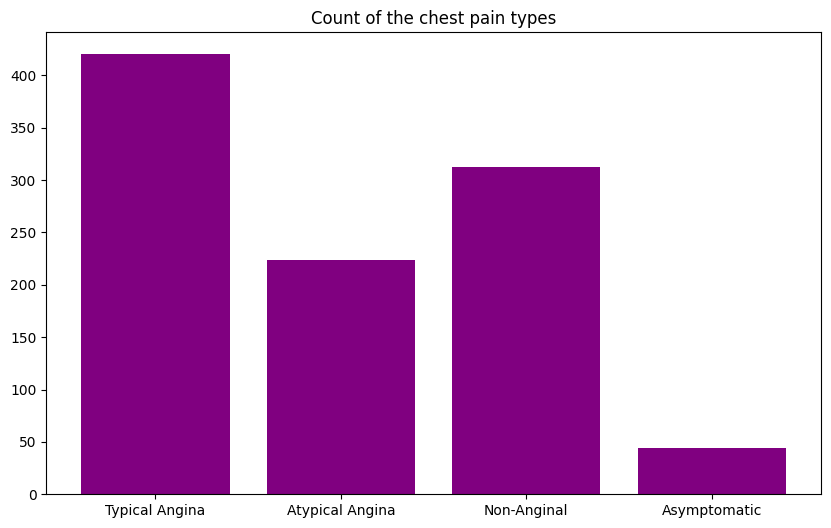

In [21]:
count_TypicalAnginaFalse, count_TypicalAnginaTrue = data['chestpain_TypicalAngina'].value_counts()
print("Number of patients with typical angina:", count_TypicalAnginaTrue)

count_AtypicalAnginaFalse, count_AtypicalAnginaTrue = data['chestpain_AtypicalAngina'].value_counts()
print("Number of patients with atypical angina:", count_AtypicalAnginaTrue)

count_NonAnginalFalse, count_NonAnginalTrue = data['chestpain_NonAnginal'].value_counts()
print("Number of patients with non-anginal pain:", count_NonAnginalTrue)

count_AsymptomaticFalse, count_AsymptomaticTrue = data['chestpain_Asymptomatic'].value_counts()
print("Number of patients with asymptomatic pain:", count_AsymptomaticTrue)

chest_pain_types = ['Typical Angina', 'Atypical Angina', 'Non-Anginal', 'Asymptomatic']
counts = [count_TypicalAnginaTrue, count_AtypicalAnginaTrue, count_NonAnginalTrue, count_AsymptomaticTrue]

plt.figure(figsize=(10, 6))
plt.bar(chest_pain_types, counts, color='purple')
plt.title('Count of the chest pain types')
plt.show()

The most common chest pain type is typical angina with a count of 420.

#### Is there a significant relationship between the presence of heart disease across the different types of chest pains?

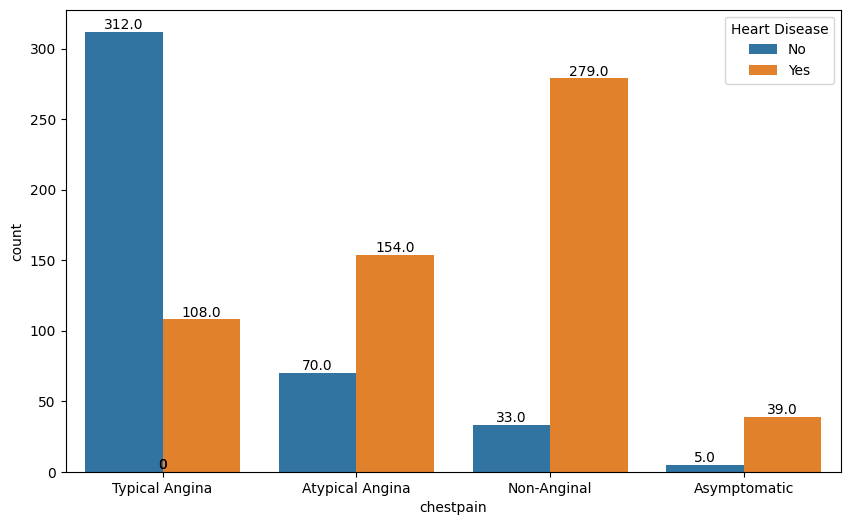

In [22]:
plt.figure(figsize=(10, 6))
ax = sb.countplot(x='chestpain', hue='target', data=rawdata)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal', 'Asymptomatic'])
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

# Annotate the plot with count values
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    x = p.get_x()  # Get the x-position of the bar
    width = p.get_width()  # Get the width of the bar
    
    # Annotate the bar with count value
    ax.annotate(f'{height}', (x + width/2, height), ha='center', va='bottom', fontsize=10)

plt.show()

Looking at the patients who suffer from heart disease, most of them had non-anginal chest pains. Hence, we can deduce that non-anginal chest pain is one of the symptoms use to predict heart diseases. 

### Is there a relationship between the presence of heart disease and fasting blood sugar?

#### Count of patients with fasting blood sugar that exceeds 120 mg/dl.

Number of patients with fasting blood sugar exceeding 120mg/dl: 296
percentage: 29.6 %


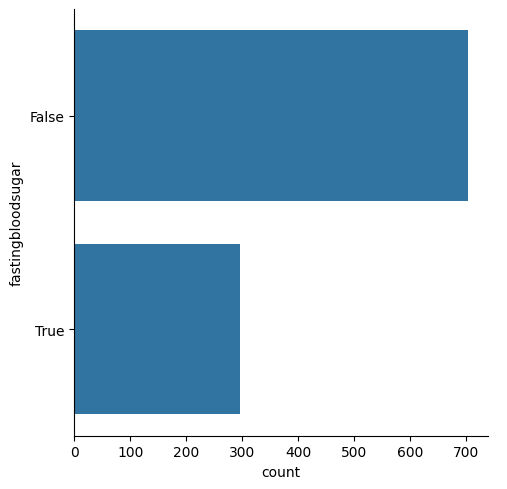

In [23]:
count_fastingbloodsugarFalse, count_fastingbloodsugarTrue = data['fastingbloodsugar'].value_counts()
print("Number of patients with fasting blood sugar exceeding 120mg/dl:", count_fastingbloodsugarTrue)
print("percentage:", count_fastingbloodsugarTrue / 10,"%")
sb.catplot(y = "fastingbloodsugar", data = data, kind = "count")

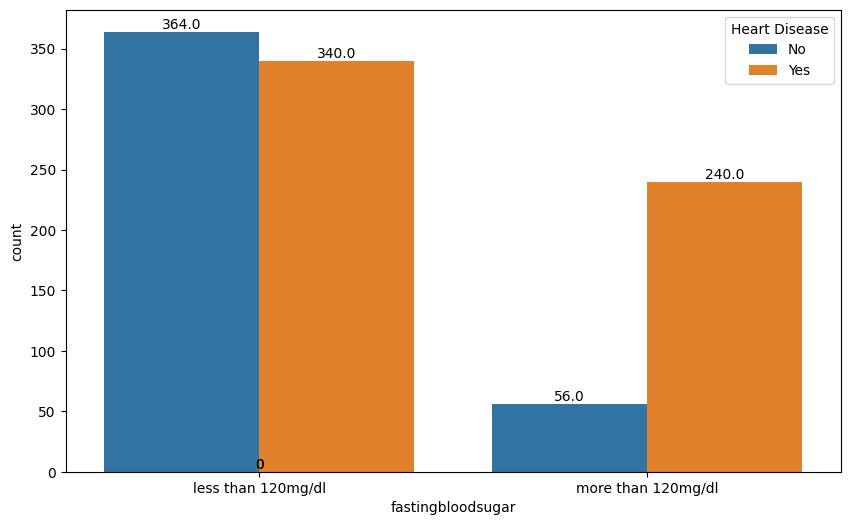

In [24]:
plt.figure(figsize=(10, 6))
ax = sb.countplot(x='fastingbloodsugar', hue='target', data=rawdata)
plt.xticks(ticks=[0, 1], labels=['less than 120mg/dl', 'more than 120mg/dl'])
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
# Annotate the plot with count values
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    x = p.get_x()  # Get the x-position of the bar
    width = p.get_width()  # Get the width of the bar
    
    # Annotate the bar with count value
    ax.annotate(f'{height}', (x + width/2, height), ha='center', va='bottom', fontsize=10)

plt.show()

In [25]:
less = (340/(364+340))*100
more = (240/(240+56))*100
print("Percentage of less with heart disease:{:.1f}%".format(less))
print("Percentage of more with heart disease:{:.1f}%".format(more))

Percentage of less with heart disease:48.3%
Percentage of more with heart disease:81.1%


As shown from above, there is a higher percentage of patients with heart disease with fasting blood sugar of more than 120mg/dl.
Hence, we can deduce that the higher the fasting blood sugar, the higher the risk of having heart disease.

#### ECG results and heart disease:

Number of patients with normal resting ECG results: 454
Number of patients with wave abnormality: 344
Number of patients with high risk of left ventricular hypertrophy: 202


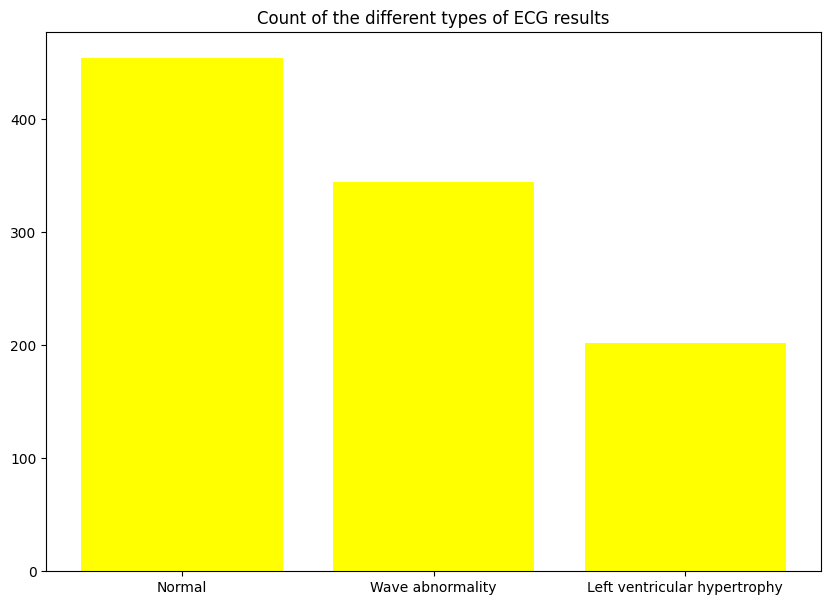

In [26]:
count_electronormalFalse, count_electronormalTrue = data['restingrelectro_Normal'].value_counts()
print("Number of patients with normal resting ECG results:", count_electronormalTrue)

count_electroabnormalFalse, count_electroabnormalTrue = data['restingrelectro_WaveAbnormality'].value_counts()
print("Number of patients with wave abnormality:", count_electroabnormalTrue)

count_electrohypertrophyFalse, count_electrohypertrophyTrue = data['restingrelectro_LeftVentricularHypertrophy'].value_counts()
print("Number of patients with high risk of left ventricular hypertrophy:", count_electrohypertrophyTrue)

ecg_types = ['Normal', 'Wave abnormality', 'Left ventricular hypertrophy']
counts = [count_electronormalTrue, count_electroabnormalTrue, count_electrohypertrophyTrue]
plt.figure(figsize=(10, 7))
plt.bar(ecg_types, counts, color='yellow')
plt.title('Count of the different types of ECG results')
plt.show()

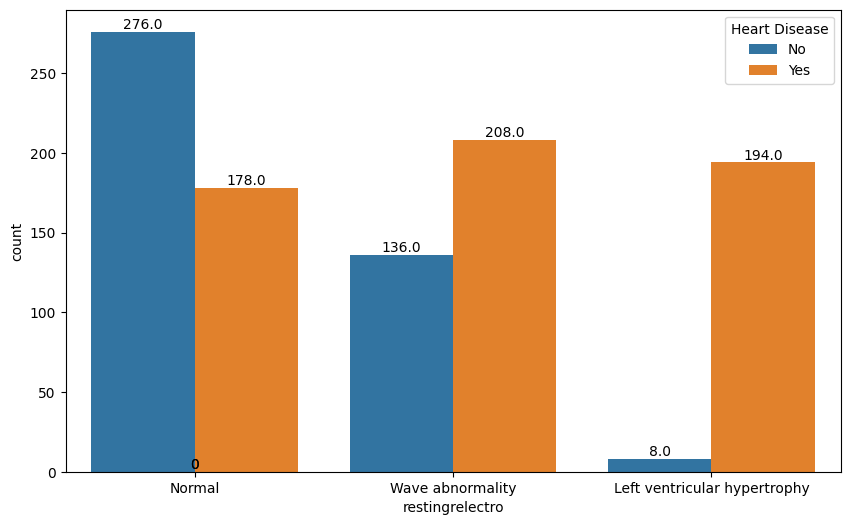

In [27]:
plt.figure(figsize=(10, 6))
ax = sb.countplot(x='restingrelectro', hue='target', data=rawdata)
plt.xticks(ticks=[0, 1, 2], labels=['Normal', 'Wave abnormality', 'Left ventricular hypertrophy'])
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    x = p.get_x()  # Get the x-position of the bar
    width = p.get_width()  # Get the width of the bar
    
    # Annotate the bar with count value
    ax.annotate(f'{height}', (x + width/2, height), ha='center', va='bottom', fontsize=10)

plt.show()

In [28]:
normal = (178/454)*100
wave = (208/344)*100
left =(194/202)*100
print("Percentage of normal ECG with heart disease:{:.1f}%".format(normal))
print("Percentage of wave abnormaly with heart disease:{:.1f}%".format(wave))
print("Percentage of high risk of left ventricular hypertrophy with heart disease:{:.1f}%".format(left))

Percentage of normal ECG with heart disease:39.2%
Percentage of wave abnormaly with heart disease:60.5%
Percentage of high risk of left ventricular hypertrophy with heart disease:96.0%


As shown from above, patients with normal ECG are not at high risk of having heart diesease compared to the other 2 types of ECG. Patients with wave abnormaly and high risk of left ventricular hypertrophy having higher risks of having heart disease. Therefore we can say that if the patients' ECG is not normal, there is a risk of haing heart disease. Hence, abnormal ECG results is a considerable factor in predicting heart disease. 

### Exercise induced angina and heart disease:

#### Number of patients with exercise induced angina:

Number of patients with exercise induced angina: 498
Percentage: 49.8 %


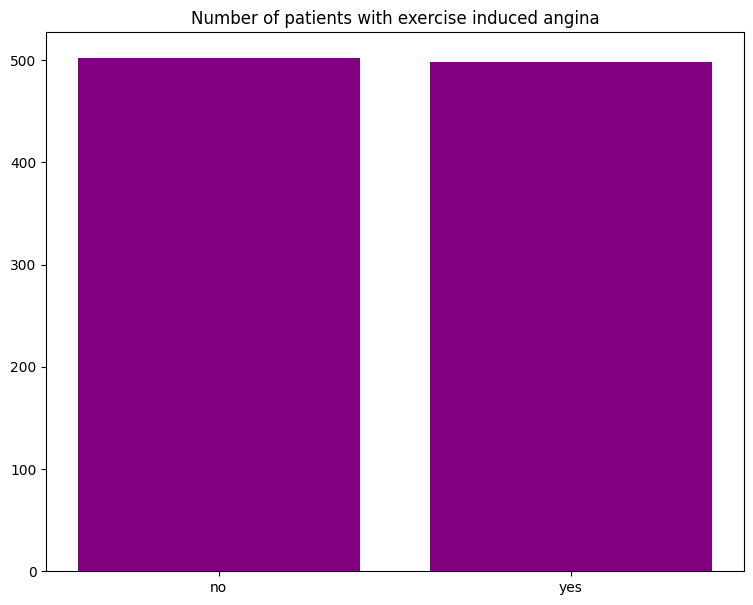

In [29]:
count_EIAFalse, count_EIATrue = data['exerciseangia'].value_counts()
print("Number of patients with exercise induced angina:", count_EIATrue)
print("Percentage:", count_EIATrue / 10,"%")

eia_types = ['no', 'yes']
counts = [count_EIAFalse, count_EIATrue]
plt.figure(figsize=(9, 7))
plt.bar(eia_types, counts, color='purple')
plt.title('Number of patients with exercise induced angina')
plt.show()

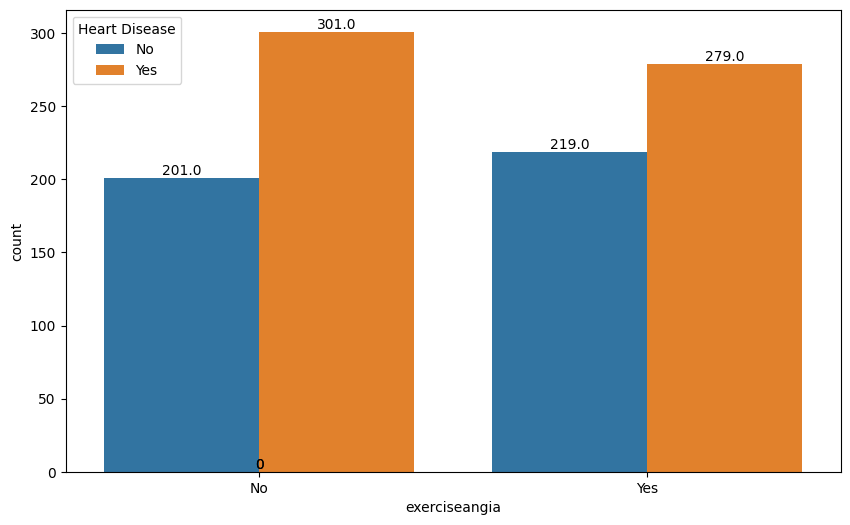

In [30]:
plt.figure(figsize=(10, 6))
ax = sb.countplot(x='exerciseangia', hue='target', data=rawdata)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    x = p.get_x()  # Get the x-position of the bar
    width = p.get_width()  # Get the width of the bar
    
    # Annotate the bar with count value
    ax.annotate(f'{height}', (x + width/2, height), ha='center', va='bottom', fontsize=10)

plt.show()

In [31]:
have = (279/(498))*100
nope= (301/(301+201))*100
print("Percentage of having exercise angina with heart disease:{:.1f}%".format(have))
print("Percentage of not having exercise angina with heart disease:{:.1f}%".format(nope))

Percentage of having exercise angina with heart disease:56.0%
Percentage of not having exercise angina with heart disease:60.0%


As shown from above, patients with or without having exercise angina have the about the same risk of having heart disease. 
Hence we can infer that there is no significant relationship between whether or not the patients experience exercise induced angina and having heart disease.

### Slope of ST segment and heart disease:

#### Number of patients with the different types of slope:

Number of patients with uplsoping ST segment: 299
Number of patients with flat ST segment: 322
Number of patients with downsloping ST segment: 199


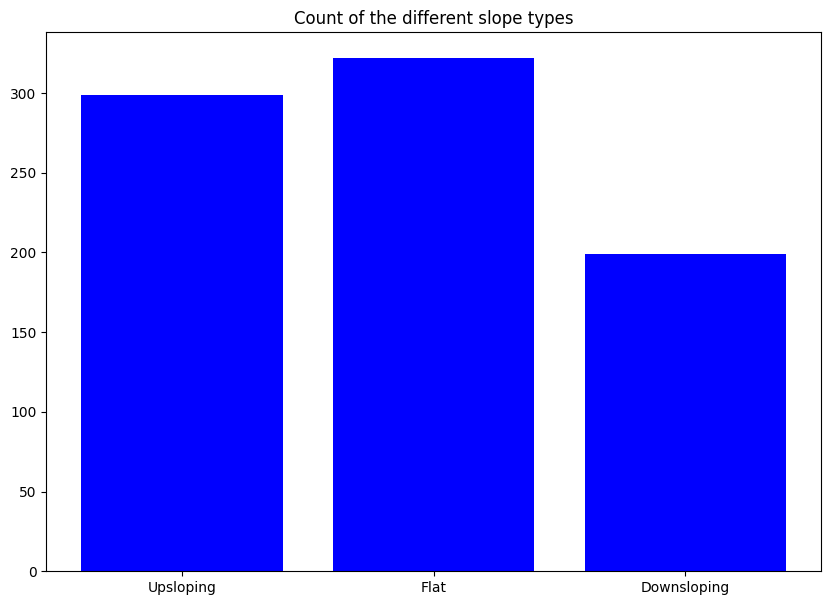

In [32]:
count_upslopeFalse, count_upslopeTrue = data['slope_Upsloping'].value_counts()
print("Number of patients with uplsoping ST segment:", count_upslopeTrue)

count_flatFalse, count_flatTrue = data['slope_Flat'].value_counts()
print("Number of patients with flat ST segment:", count_flatTrue)

count_downFalse, count_downTrue = data['slope_Downsloping'].value_counts()
print("Number of patients with downsloping ST segment:", count_downTrue)

slope_types = ['Upsloping', 'Flat', 'Downsloping']
counts = [count_upslopeTrue, count_flatTrue, count_downTrue]
plt.figure(figsize=(10, 7))
plt.bar(slope_types, counts, color='blue')
plt.title('Count of the different slope types')
plt.show()

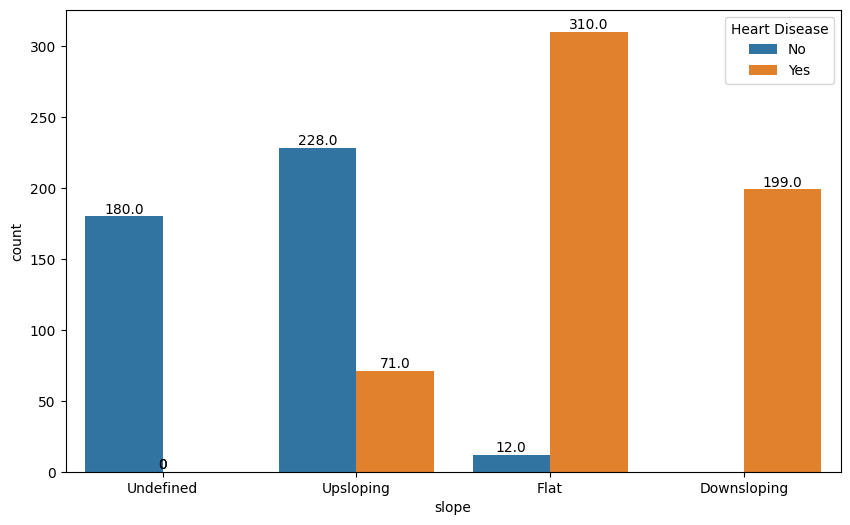

In [33]:
plt.figure(figsize=(10, 6))
ax = sb.countplot(x='slope', hue='target', data=rawdata)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Undefined', 'Upsloping', 'Flat', 'Downsloping'])
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    x = p.get_x()  # Get the x-position of the bar
    width = p.get_width()  # Get the width of the bar
    
    # Annotate the bar with count value
    ax.annotate(f'{height}', (x + width/2, height), ha='center', va='bottom', fontsize=10)

plt.show()

In [34]:
up = (71/(299))*100
flat = (310/322)*100
down = (199/199)*100
print("Percentage of upsloping with heart disease:{:.1f}%".format(up))
print("Percentage of flat with heart disease:{:.1f}%".format(flat))
print("Percentage of down with heart disease:{:.1f}%".format(down))

Percentage of upsloping with heart disease:23.7%
Percentage of flat with heart disease:96.3%
Percentage of down with heart disease:100.0%


As shown from above, patients with a flat slope are at a high likelihood of having heart disease. Patients who have a downsloping ST segment are almost definitely suffering from heart disease. Hence we can infer that flat slope or downslope results of the ST segment are significant symptoms in predicting heart disease. 

# Summary of variables with high correlations to having heart disease

Variables that have strong correlations to having heart disease are: 
1. Resting Blood Pressure (restingBP)
2. Number of Major Vessels (noofmajorvessels)
3. Fasting Blood Sugar (fastingbloodsugar)
5. Chest Pain Type (chestpain_TypicalAngina, chestpain_AtypicalAngina, chestpain_NonAnginal, chestpain_Asymptomatic)
4. Resting ECG (restingrelectro_LeftVentricularHypertrophy)
5. Slope of ST Segment (slope_Undefined, slope_Upsloping, slope_Flat, slope_Downsloping)

## Removing Unnecessary Columns From The Data Set

To remove variables such as age, serum cholesterol, old peak, etc., that are not predictive of heart disease.

In [35]:
df = data[[
    'hasHeartDisease',
    'restingBP',
    'noofmajorvessels',
    'fastingbloodsugar',
    'chestpain_TypicalAngina',
    'chestpain_AtypicalAngina',
    'chestpain_NonAnginal',
    'chestpain_Asymptomatic',
    'restingrelectro_LeftVentricularHypertrophy',
    'slope_Undefined',
    'slope_Upsloping',
    'slope_Flat',
    'slope_Downsloping'
]]

df

,hasHeartDisease,restingBP,noofmajorvessels,fastingbloodsugar,chestpain_TypicalAngina,chestpain_AtypicalAngina,chestpain_NonAnginal,chestpain_Asymptomatic,restingrelectro_LeftVentricularHypertrophy,slope_Undefined,slope_Upsloping,slope_Flat,slope_Downsloping
0,True,171,3,False,False,False,True,False,False,False,False,False,True
1,False,94,1,False,True,False,False,False,False,False,True,False,False
2,False,133,0,False,False,False,True,False,False,False,True,False,False
3,True,138,2,True,True,False,False,False,False,False,False,True,False
4,True,199,2,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,139,2,False,False,False,True,False,True,False,False,True,False
996,False,143,0,True,False,False,False,True,False,False,True,False,False
997,True,156,1,True,True,False,False,False,False,False,False,False,True
998,True,186,2,False,False,True,False,False,False,False,False,False,True


The table above shows the raw data of variables that has a strong correlation to having heart disease.

In [36]:
df.to_pickle(os.path.join("data","data_explore.pkl"))